In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import mglearn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Text(0, 0.5, 'Feature 1')

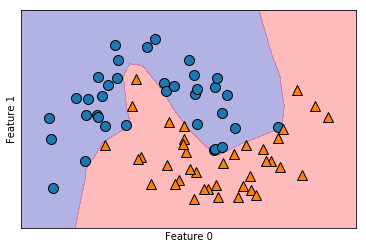

In [6]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0)\
    .fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


Text(0, 0.5, 'Feature 1')

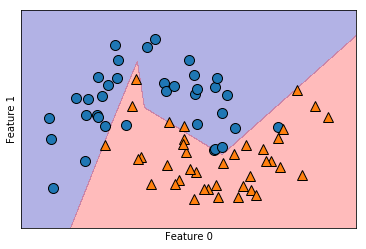

In [9]:
mlp= MLPClassifier(solver='lbfgs', 
                   random_state=3, 
                   hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, 
                                X_train,
                                fill=True, 
                                alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

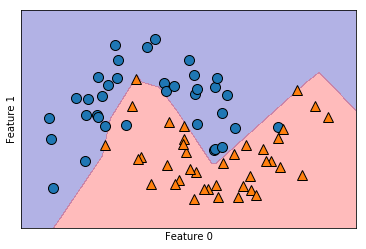

In [12]:
# using two hidden layers, with 10 units each

mlp = MLPClassifier(solver='lbfgs',
                    random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp,
                                X_train,
                                fill=True,
                                alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], 
                         X_train[:, 1], 
                         y_train)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

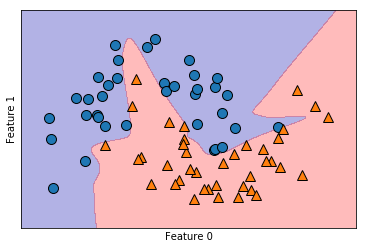

In [13]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity
mlp = MLPClassifier(solver='lbfgs',
                    random_state=0,
                    activation='tanh',
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp,
                                X_train,
                                fill=True,
                                alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0],
                         X_train[:, 1],
                         y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

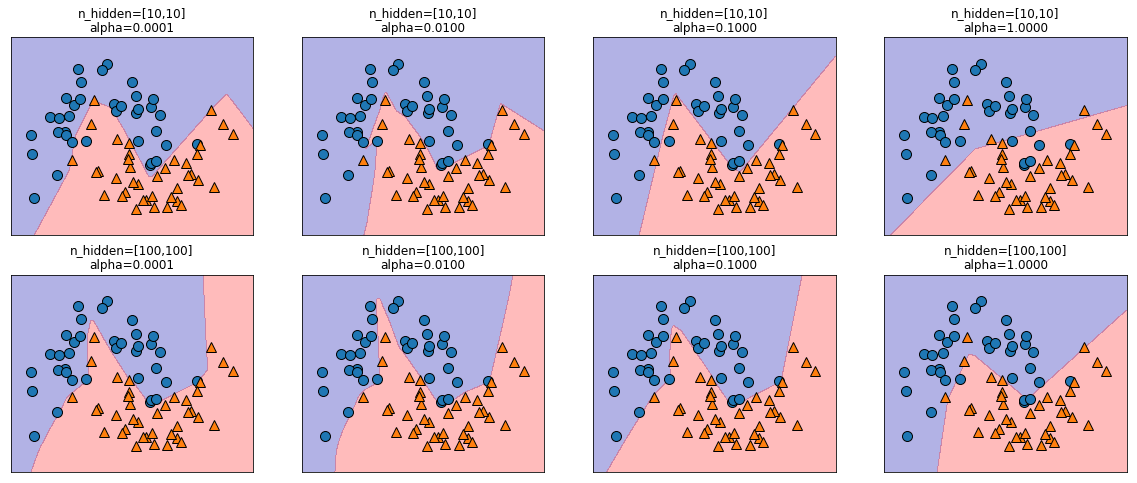

In [20]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs',
                            random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp,
                                        X_train,
                                        fill=True,
                                        alpha=0.3,
                                        ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{},{}]\nalpha={:.4f}".format(n_hidden_nodes,
                                                             n_hidden_nodes,
                                                             alpha))
